Для удобства я облачил процесс обучения и тестирования в функции

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [12]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [13]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [4]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [29]:
### Шаг 3. Обученние нейронной сети
def neuro_net_train(neuron_numb, era, nu, X_train_loc= None, y_train_loc=None):
    # определим число нейронов скрытого слоя
    #neuron_numb = 35


    # присваевание случайных весов



    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(era):

        # прямое распространение(feed forward)
        layer0 = X_train_loc
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train_loc - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * nu
        w0 += layer0.T.dot(layer1_delta) * nu
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    return [accuracy, errors, layer2], [w0, w1]
    
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
def represent_train(errors):
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

def represent_res(layer, y_train):
    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer[:N,1], 'r',label = 'Y new')
    plt.plot(y_train[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть '''
    
def accuracy(accuracy):     
    print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

тестовая проверка работы функции обучения

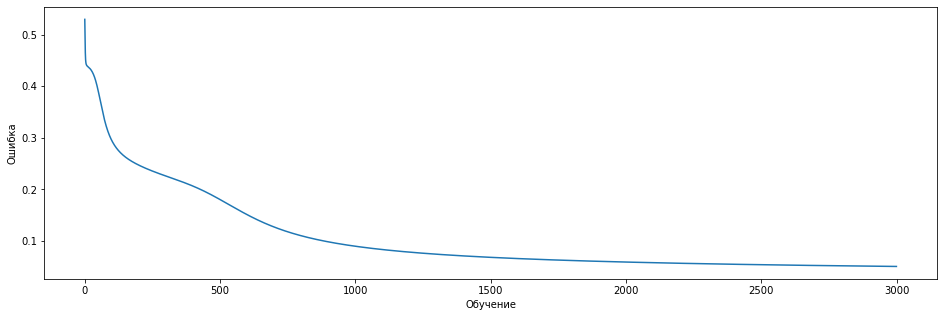

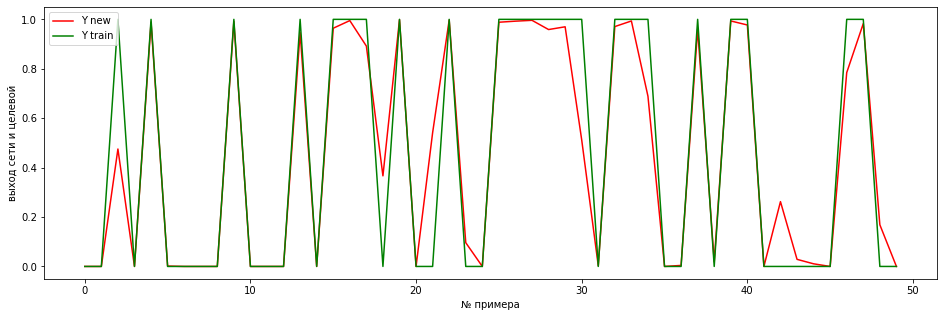

Аккуратность нейронной сети 94.97%


In [30]:
results, params = neuro_net_train(5, 3000, 0.05, X_train, y_train)
represent_train(results[1])
represent_res(results[2], y_train)
accuracy(results[0])

тестовая проверки работы функции запуска сети

In [32]:
def neuro_net_run(params, X_test_loc, y_test_loc):
    # прямое распространение(feed forward)
    layer0_t = X_test_loc
    layer1_t = sigmoid(np.dot(layer0_t, params[0]))
    layer2_t = sigmoid(np.dot(layer1_t, params[1]))
    layer2_error_t = y_test_loc - layer2_t
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100
    return [accuracy_t, layer2_t]
    

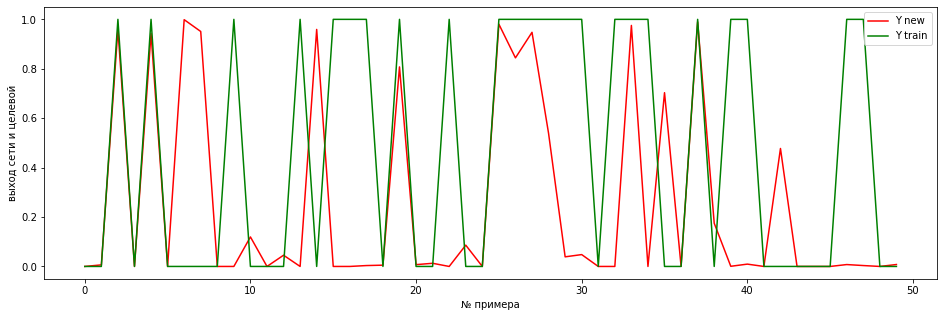

Аккуратность нейронной сети 95.67%


In [33]:
res = neuro_net_run(params,X_test, y_test)

represent_res(res[1], y_train)
accuracy(res[0])

запуск цикла для записи всех значений в датафрейм

In [94]:
Error_table = pd.DataFrame(columns =['neurons number', 'learning rate', 'epoch', 'mean acc.(train)', 'mean acc.(test)'] )
ind = 0
for neurons in [1, 3, 5, 7, 10, 15, 30, 50, 100, 200]:
    for learn_rate in [0.0001, 0.005, 0.05, 0.5]:
        acc_mas = []
        acc_mas_t = []
        for era in [1000, 2000, 5000]:
            for j in range(10):
                results, params = neuro_net_train(neurons, era, learn_rate, X_train, y_train)
                acc_mas.append(results[0])
                res = neuro_net_run(params,X_test, y_test)
                acc_mas_t.append(res[0])
            Error_table.loc[ind, ['neurons number', 'learning rate', 'epoch', 'mean acc.(train)', 'mean acc.(test)']] \
                                        = [neurons, learn_rate, era, np.mean(acc_mas), np.mean(acc_mas_t)]
            ind += 1

In [96]:
Error_table

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
0,1,0.0001,1000,51.3035,51.2631
1,1,0.0001,2000,51.735,51.6865
2,1,0.0001,5000,52.1353,52.019
3,1,0.005,1000,55.7216,55.1727
4,1,0.005,2000,55.878,55.1019
...,...,...,...,...,...
115,200,0.05,2000,66.6666,66.6666
116,200,0.05,5000,66.6666,66.6666
117,200,0.5,1000,59.8667,56.9333
118,200,0.5,2000,58.0667,57.2


In [97]:
Error_table.to_csv('Error_table.csv')

In [105]:
Error_table.sort_values(['mean acc.(test)'], ascending = False).head(30)

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
47,7,0.5,5000,95.9739,97.0386
71,15,0.5,5000,96.0565,97.0196
59,10,0.5,5000,95.9842,97.0022
35,5,0.5,5000,95.9934,96.939
23,3,0.5,5000,95.9204,96.9162
46,7,0.5,2000,95.6773,96.7511
58,10,0.5,2000,95.6939,96.7018
70,15,0.5,2000,95.7737,96.6908
34,5,0.5,2000,95.7289,96.5827
22,3,0.5,2000,95.66,96.552


Из таблицы выше выидно, что лучшие результаты получаются у сетей с 3 -15 нейронов при этом скорость обучения 0.5. Увеличение количества эпох не сильно повлияло на эффективность.

In [107]:
Error_table.sort_values(['mean acc.(test)']).head(30)

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
0,1,0.0001,1000,51.3035,51.2631
105,100,0.5,1000,49.2667,51.4667
1,1,0.0001,2000,51.735,51.6865
12,3,0.0001,1000,51.5906,51.9429
2,1,0.0001,5000,52.1353,52.019
24,5,0.0001,1000,52.9377,52.6221
13,3,0.0001,2000,52.7914,52.8478
25,5,0.0001,2000,53.6553,53.4098
36,7,0.0001,1000,53.8076,53.4982
14,3,0.0001,5000,53.6784,53.5763


Хуже всего ведут себя сети с очень маленьким количеством нейронов и с очень маленькой сокростью обучения. Так же плохо себя показывают сети с очень большим количеством нейронов.

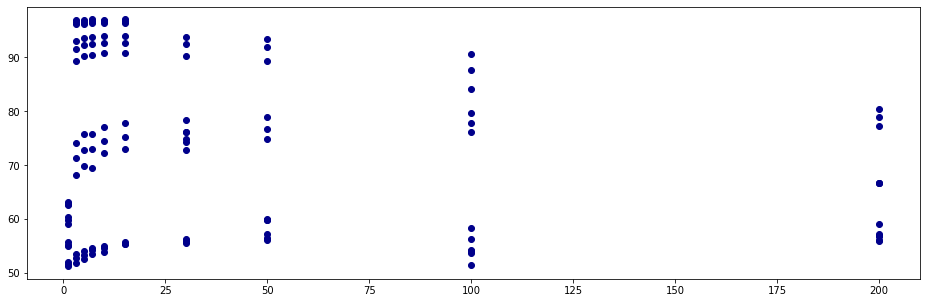

In [110]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['neurons number'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show()                                     

Выше сказанное можно понять и по графику. Лучшие показатели у сетей с нейронами от 3 - 20, но при этом в них и самый большой разброс

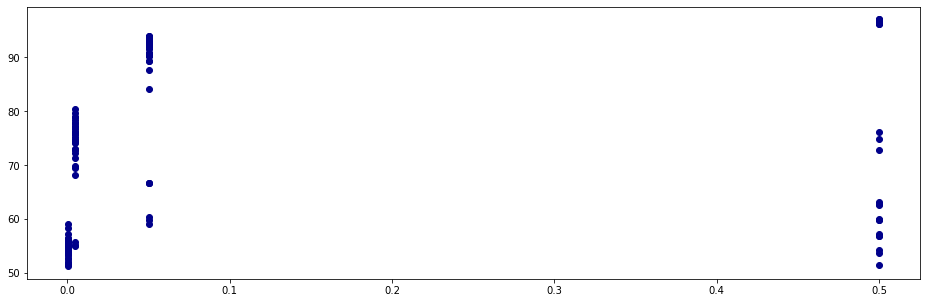

In [114]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['learning rate'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show()  

Так же можно сказать, что самые лучшие показатели у скорости обучения 0.5, чуть хуже у 0.05,
остальные скорости обучения проигрывают этим двум. Однако, у скорости 0.5 очень много низких значений, 
это, как было видно из таблицы, вызвано либо большим/слишком малым количеством нейронов

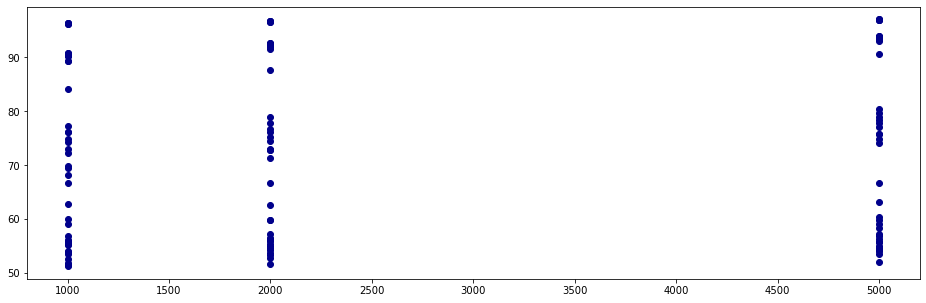

In [115]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['epoch'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show() 

При этом можно сказать, что количество эпох не влияет определяющим образом на качество обучения модели, хотя из данных можно заметить, что при большом количестве эпох сети с большим количеством нейронов начинают вести себя лучше